# Прогнозирование популярности игр на 2017 год

**Цель:**
Выявить потенциально самый популярный продукт


**Задачи:**
1. Обработать полученные данные
2. Выявить факторы, которые влияют на прогнозирование популярного продукта
3. Исходя из предыдущего пункта, спрогнозировать наиболее популярный продукт

# Шаг 1 - импорт библиотек и чтение файла

In [2]:
#Импорт библиотек
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [3]:
# Прочитаем файл и выведем первые 5 строк

data = pd.read_csv('https://raw.githubusercontent.com/Lenassskuh/python_project/main/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2 - предобработка данных

In [6]:
#Приведём названия столбцов к нижнему регистру 
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметим, что в данных не везде верно указан тип, а так же есть пропуски. 

In [7]:
#Поменяем тип данных
data['year_of_release']=data['year_of_release'].astype('Int64')
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['user_score']=data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Заменила тип данных в двух столбцах. Первый - это значение года, оно явно не может быть дробным. Второе - это счёт, он тоже явно не может быть типа object

tbd обработала следующим образом: заменила его на nan. Таким образом, мы можем обработать столбец user_score, приводя остальные значения к типу float

In [8]:
#Посмотрим в каких столбцах сколько пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
data = data.dropna(axis='index', how='any', subset=['name'])
data = data.dropna(axis='index', how='any', subset=['genre'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

В столбце name было только 2 пропущенных значения. Так как всего у нас данных более 16000, то эти значения не повлияют на анализ. Остальные столбцы, в которых есть пропуски, - это оценки и год. Очевидно, что эти пропуски мы никак заполнить не сможем. Оценки - это субъуктивное мнения каждого, а год не понятно каким значеним заполнять. 

Пропущенные знчаения могут быть и сравнительно новых игр (которые вот-вот появились), из-за того что им просто не успели проставить оценки, также некоторые игры могли быть выпущены сравнительно давно, поэтому дата их выхода, рейтинг и вцелом многая информация не сохранилась. Также нельзя забывать о различных сбоях и о человеческом факторе

In [11]:
#Посчитаем продажи для всех регионов
data['sales']=data['na_sales']+data['jp_sales']+data['eu_sales']+data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Шаг 3 - нахождение взаимосвязей

In [12]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Очевидно, что данные за все периоды не важны. До 1993 года выпускалось совсем мало игр. В целом можно рассматривать период с 2000 года. 

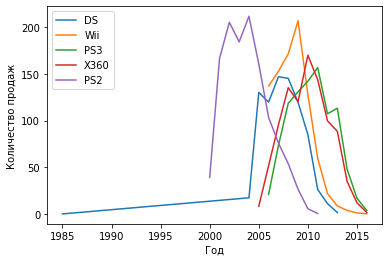

In [13]:
#Выберем 5 платформ с наибольшими продажами, затем построим распределение по годам
data.groupby('platform')['sales'].sum().sort_values().tail()
plat=['DS', 'Wii', 'PS3', 'X360', 'PS2']
for i in plat:
  data.query('platform==@i').groupby('year_of_release')['sales'].sum().plot(legend=True, label=i)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()


Заметим, что в период с 2005 по 2015 года исчезают старые платформы и появляются новые

Заметим, что популярность платформ в среднем длится приблизительно 5 лет, а также в среднем за 10-15 платформа каждая платформа проходит свой "жизненный цикл"

Выберем акуальный период - период с 2014 года по 2016

In [14]:
data['year_of_release'].dropna
df=data[data['year_of_release'] >= 2014]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [15]:
df['platform'].value_counts()


PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

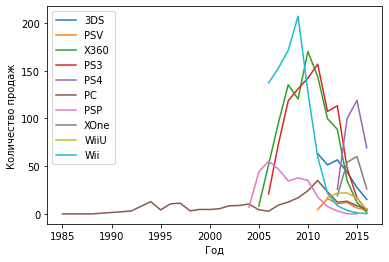

In [16]:
data.groupby('platform')['sales'].sum().sort_values().tail()
plat=['3DS', 'PSV', 'X360', 'PS3', 'PS4', 'PC', 'PSP', 'XOne', 'WiiU', 'Wii'] #DS в выборку не берём, потому что он явно уже пошёл на спад
for i in plat:
    data.query('platform==@i').groupby('year_of_release')['sales'].sum().plot(legend=True, label=i)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

Можем заметить, что продажи на многих платформах к 2016 году уже пошли на спад. Можно выделить 2 наиболее прибыльные платформы - XOne и PS4

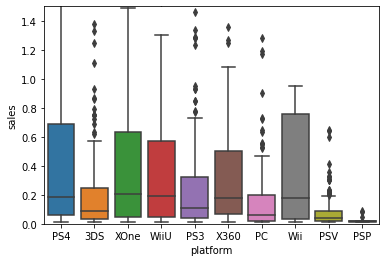

In [17]:
#Построим "ящик с усами"
sns.boxplot(data=df, x='platform', y ='sales')
plt.ylim(0, 1.5)
plt.show()

Можем заметить, что наиболее большая выборка у платформ X360, Wii но если посмотреть на прошлый график, можно увидеть, что у этих платформ пик продаж давно прошёл. Наименьшая же выборка у платформ PSP и PSV, но так как они не так давно вышли на рынок, эти результаты вполне логичны

Для следующего пункта я выбрала платформу PS4. Посчитаем корреляцию и построим диаграмму рассеивания

In [18]:
print('Корреляция между оценками критиков и продажами для PS4', df.query('platform == "PS4"')['critic_score'].corr(df.query('platform == "PS4"')['sales']))

Корреляция между оценками критиков и продажами для PS4 0.402661410681041


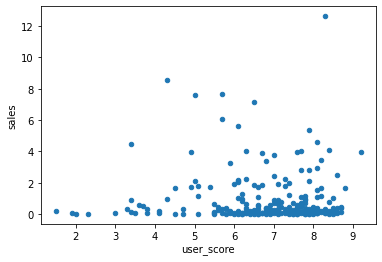

In [19]:
#Построим диаграмму рассеивания
df_ps4=df[df['platform']=='PS4']
df_ps4.plot(x='user_score', y='sales', kind='scatter')

Исходя из полученных данных, можно сделать вывод, что, что небольшая взаимосвязь между оценками и продажами есть

Возьмём 5 платформ для сравнения с результатами предыдущего пункта

Корреляция между оценками критиков и продажами для PS3 0.44657460493190704
Корреляция между оценками критиков и продажами для PS4 0.402661410681041
Корреляция между оценками критиков и продажами для PSV 0.04266490657009524
Корреляция между оценками критиков и продажами для 3DS 0.314117492869051
Корреляция между оценками критиков и продажами для X360 0.5257228356581523


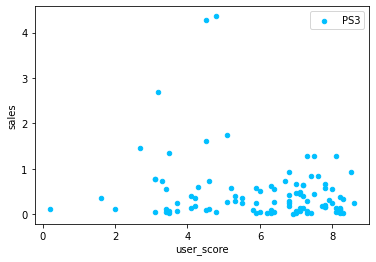

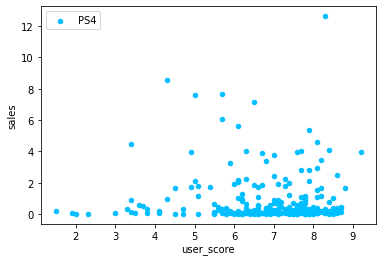

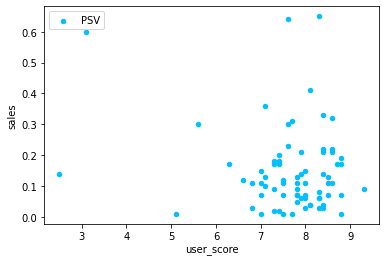

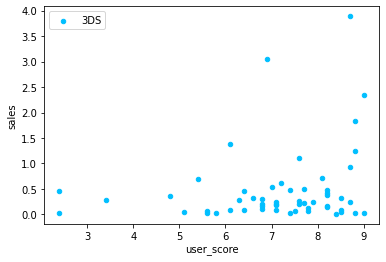

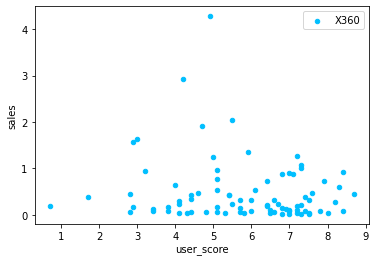

In [20]:
plat=['PS3', 'PS4', 'PSV', '3DS', 'X360']
for i in plat:
  pop=df[df['platform']==i]
  pop.plot(x='user_score', y='sales', kind='scatter', label=i, color='deepskyblue')
  print('Корреляция между оценками критиков и продажами для', i, df[df['platform']==i]['critic_score'].corr(df[df['platform']==i]['sales']))

Можем заметить, что взаимосвзяь между оценками и количеством продаж у этих платформ уже ниже, чем у PS4. У PSV её совсем нет.

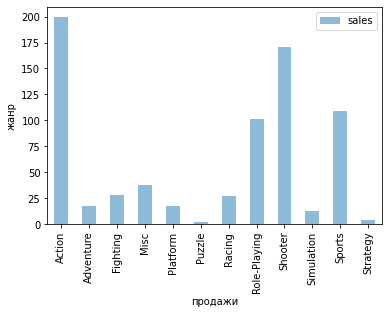

In [21]:
df.pivot_table(index='genre', values='sales', aggfunc='sum').plot(kind='bar', alpha=0.5)
plt.ylabel('жанр')
plt.xlabel('продажи')
plt.legend()
plt.show()

Заметим, что больше всего продаж в жанрах Action, Shooter, Role-Playing, Sports. Меньше всего продаж в жанрах Puzzle, Strategy. Заметим, что продажи самых прибыльных жанров намного больше, чем продажи других жанров. Самые прибыльные жанры явно предполагают какое-то непрерывное действие. Это не лёгкие, спокойные игры. Это игры, где происходит много экшена

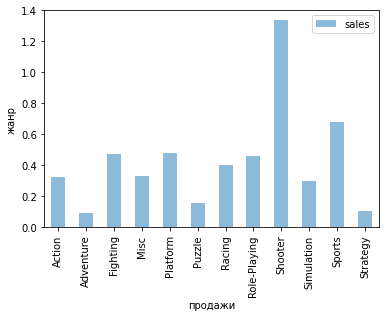

In [22]:
df.pivot_table(index='genre', values='sales', aggfunc='mean').plot(kind='bar', alpha=0.5)
plt.ylabel('жанр')
plt.xlabel('продажи')
plt.legend()
plt.show()

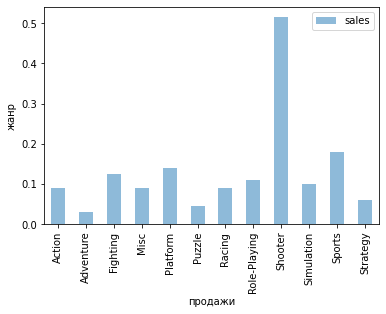

In [23]:
df.pivot_table(index='genre', values='sales', aggfunc='median').plot(kind='bar', alpha=0.5)
plt.ylabel('жанр')
plt.xlabel('продажи')
plt.legend()
plt.show()

Исходя из вышепостроенных графиков, можно сделать вывод, что есть один наиболее прибыльный жанр - Shooter. Это жанр компьютерных игр, где надо стрелять в определённые объекты. Такой результат в целом соотносится с ситуацией в реальной жизни. Действительно в большинстве случаев люди выбирают этот жанр компьютерных игр.

# Шаг 4 - рассмотрим зависимость некоторых показателей от региона

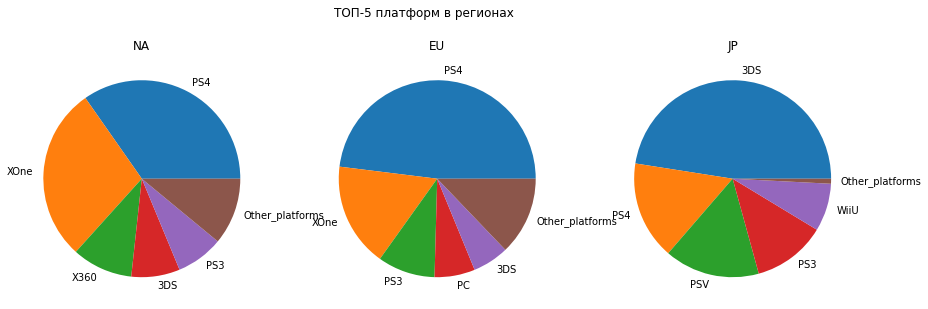

In [26]:
from matplotlib.figure import SubplotParams
# задаем список регионов
countries = df.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df.groupby('platform')[countries[i]].sum().reset_index().
          sort_values(countries[i], ascending = False, ignore_index = True).
          head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # зададим название региона
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Заметим, что в Северной Америке и в Европе расппределение наиболее популярных платформ приблизительно одинаковая. В Японии же они кардинально отличаются. Возможно, это может быть обусловлено менталитетом и в целом совершенно отличающейся культорой страны.

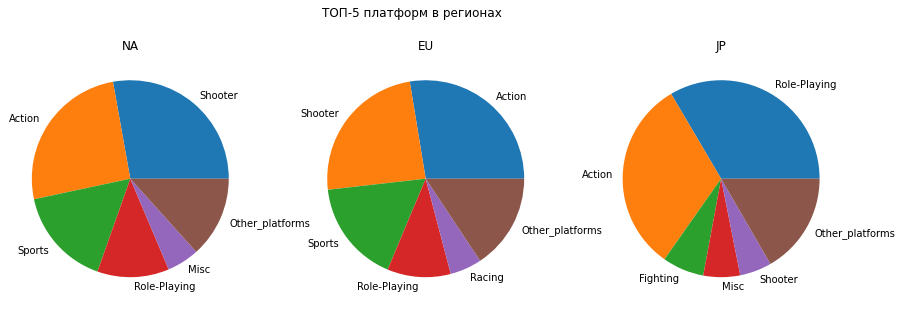

In [27]:
from matplotlib.figure import SubplotParams
# задаем список регионов
countries = df.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df.groupby('genre')[countries[i]].sum().reset_index().
          sort_values(countries[i], ascending = False, ignore_index = True).
          head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'genre': 'Other_platforms', countries[i]: df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])

  # зададим название региона
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


В жанрах проглядывается похожая тенденция. В Северной Америке и Европе приблизительно одинаковое распределение популярных жанров. В Японии же это распределение кардинально отличается опять же по тем причинам, что описаны выше

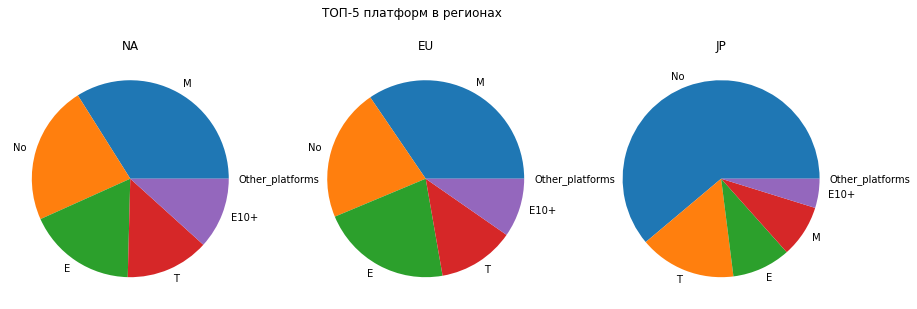

In [29]:
# задаем список регионов
countries = df.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df.groupby('rating')[countries[i]].sum().reset_index().
          sort_values(countries[i], ascending = False, ignore_index = True).
          head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'rating': 'Other_platforms', countries[i]: df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])

  # зададим название региона
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Заполнила пропуски словом No для того чтобы узнать, какая доля пропусков для каждого региона. Тут примечательно опять же, что в Японии более половины значений рейтинга пропущены (опять же это может быть связано с тем, что в Японии совершенно другие правила интересы, возможно для них этот рейтинг вообще не играет никакой роли). В Северной Америке и Европе же чаще всего покупают игры с рейтингом М.

# Шаг 5 - проверим гипотезы

Cформулируем 2 нулевые гипотезы

1. H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

   H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.


2. H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равные.

   H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки гипотез будем использовать T-test, так как распределение данных в этом датасете близко к нормальному (следовательно, мы можем его использовать). В целом, T-test  - это стандартный метод для определения значительности разности значений в двух группах

In [30]:
xbox=df[df['platform']=='XOne'].dropna()
pc=df[df['platform']=='PC'].dropna()
alpha = .05
results = st.ttest_ind(
    xbox['user_score'], 
    pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


Первая гипотеза действительно верна. Действительно рейтинги этих платформ приблизительно одинаковые.


In [31]:
act=df[df['genre']=='Action'].dropna()
spo=df[df['genre']=='Sports'].dropna()
alpha = .05
results = st.ttest_ind(
    act['user_score'], 
    spo['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.0540895999943536e-10
Отвергаем нулевую гипотезу


Вторая нулевая гипотеза не верна

# Шаг 6 - вывод


Итак, сформулируем итоговой вывод

Что было сделано?
1. Во_первых, были проанализированы все входные данные.
2. Были проанализированы зависимости продаж от рейтинга и региона
3. Была проанализирована популярность той или иной игры к началу 2016 года

Выводы

1. Популярность игры зависит от региона, в котором мы работаем. В Японии у пользователей интересы очень сильно отличаются от интересов в других странах.
2. Популярность зависит от жанра. В СА и Европе, к примеру, наиболее популярен action. В Японии же role-playing.
3. Популярность зависит от рейтинга, но не очень сильно.
4. В общем случае на 2017 можно спрогнозировать наибольшую популярность платформе PS4. 